# Sentiment analysis of tweets

### Problem Statement

We are going to Build a Sentiment Analysis Model that will take the Reviews of the customers and try to predict the Sentiment. The Sentiment can be **positive**, **neutral** or **negative**.

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [213]:
df=pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [214]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Using only text and airline_sentiment for analysis

In [215]:
df=df.loc[:,['text','airline_sentiment']]

In [216]:
df.duplicated().sum()

188

In [217]:
df.drop_duplicates(inplace=True)

In [218]:
df.duplicated().sum()

0

In [219]:
df.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [220]:
df.shape

(14452, 2)

In [221]:
df.sample(5)

,text,airline_sentiment
1625,.@united I think not. I'm not flying you again...,negative
7274,Kudos well deserved! Just wish the rest of my ...,positive
9953,@USAirways Ill never fly you again due to the ...,negative
10436,@USAirways @rylietolbert15 wow you wouldn't say,negative
12516,@AmericanAir they are giving cots to the peopl...,negative


In [222]:
for i in df['text'][:100]:
    print(i)

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@V

#### we can see that there are lots of special characters, smiley that has to be removed

In [223]:
import re
import nltk
from nltk.corpus import stopwords

In [224]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [225]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'or', 'through', 'their', 'not', 'only', 'such', 'who', 'just', 'them', 'did', 'him', 'above', 'himself', 'its', 'against', 'herself', 'needn', 'before', 'don', 'while', 'should', 'why', 'by', 'a', 'yourself', "isn't", "you'll", 'were', 'own', 'but', 'itself', 'am', 'out', 'other', "couldn't", 'do', "hasn't", "mightn't", "mustn't", 'doing', "doesn't", "weren't", 'all', 'didn', "wasn't", 'during', 'after', 'too', 'and', 'themselves', 'at', 'does', 'then', 'now', 'o', 'we', "aren't", 'had', 'ourselves', 're', 'this', 'm', 'yourselves', 'wouldn', 'for', 'mightn', 'nor', 'whom', 'because', 'both', 'ours', 'ain', 'wasn', 'mustn', 'in', 'she', 'been', 'myself', 'most', 'our', "don't", "you're", 'her', "should've", 'once', 'won', 'hers', 'which', 'further', 'into', 'up', 'me', 'below', 'as', 'has', 'where', 'his', 'of', 'aren', 'it', 'about', 'few', "she's", 'i', 'the', 'again', 'y', 'that', 'on', 'haven', "didn't", 'he', 'weren', 'couldn', 'when', 'any', "you've", 'your', 'more', "won't", '

In [226]:
def noise(txt):
    txt=re.findall(r'@\w+|[^a-zA-Z\s]',txt)
    return txt

In [227]:
df['noise']=df['text'].apply(noise)
df['noise']

0             [@VirginAmerica, @dhepburn, .]
1            [@VirginAmerica, ', ., ., ., .]
2            [@VirginAmerica, ', ., ., ., !]
3         [@VirginAmerica, ', ", ", ', &, ;]
4                        [@VirginAmerica, ']
                        ...                 
14635                      [@AmericanAir, .]
14636    [@AmericanAir, 2, 0, ., 1, 5, ., ']
14637                [@AmericanAir, #, 1, 0]
14638       [@AmericanAir, ,, ,, ', !, ?, ?]
14639          [@AmericanAir, 8, 2, ., 4, ?]
Name: noise, Length: 14452, dtype: object

In [228]:
# visualizing the noise
my_noise=set(element for list in df['noise'] for element in list )
print(sorted(my_noise))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', '@0xjared', '@10AM', '@12am', '@2littlebirds', '@3', '@41CGQueen', '@44Stocker', '@4geiger', '@5', '@930', '@9NEWS', '@AARP', '@ABC', '@ABC11_WTVD', '@ABCNetwork', '@ALSTDI', '@ALfamilyoffour', '@AMiltx3', '@ATWOnline', '@AUStinAirport', '@AUmilo1', '@A_Life_Story_', '@ActingOutMgmnt', '@Active_Aly', '@Adam_Karren', '@Addair', '@AdmiralsClub', '@AerocivilCol', '@AggieMensGolf', '@AirCanada', '@AirNZUSA', '@AirSouthwest', '@AirTahitiNui', '@Airbus', '@AirlineAdviser', '@AirlineGeeks', '@AlaskaAir', '@AlbertBreer', '@AllegiantTravel', '@Amagrino', '@AmericanAir', '@AmericanAirBR', '@Analystdoc', '@AndrewBiga', '@AndrewFallis', '@Andrew_Wasila', '@AnnetteNaif', '@Apollochplayers', '@ArminRosen', '@AshevilleAir', '@AshleyKAtherton', '@AskAmex', '@AskPayPal', '@AuroraBIZ', '@Australia', '@B787fans', '@BA_USA', '@BBBNE_SD_KS_IA', '@BBB_media',

In [229]:
# lemmatization
from nltk.stem import WordNetLemmatizer

In [230]:
lemma=WordNetLemmatizer()

In [231]:
def final(txt):
    txt=txt.lower()
    rmvd_txt= ' '.join([lemma.lemmatize(word) for word in txt.split() if word not in stop_words])
    new_txt=re.findall(r'\b(?<!@)[a-zA-Z]+\b',rmvd_txt)
    return ' '.join(new_txt)

In [232]:
df['cleansed text']=df['text'].apply(final)

In [233]:
df.head()

,text,airline_sentiment,noise,cleansed text
0,@VirginAmerica What @dhepburn said.,neutral,"[@VirginAmerica, @dhepburn, .]",said
1,@VirginAmerica plus you've added commercials t...,positive,"[@VirginAmerica, ', ., ., ., .]",plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,"[@VirginAmerica, ', ., ., ., !]",today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,"[@VirginAmerica, ', "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,"[@VirginAmerica, ']",really big bad thing


### Data visulaization 

In [234]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize # to convert sentences into word tokens
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [235]:
all_tokens=[ word for sentence in df['cleansed text'] for word in word_tokenize(sentence)\
            if not re.findall(r'\b[a-zA-z]\b',word) ]

In [236]:
FreqDist(all_tokens)

FreqDist({'flight': 4402, 'get': 1368, 'co': 1207, 'http': 1146, 'cancelled': 1046, 'thanks': 1045, 'service': 981, 'hour': 969, 'time': 909, 'help': 873, ...})

In [237]:
pd.DataFrame(FreqDist(all_tokens).items(),columns=['tokens','freq']).\
sort_values(by='freq',ascending=False).head(10)

,tokens,freq
29,flight,4402
188,get,1368
54,co,1207
93,http,1146
432,cancelled,1046
95,thanks,1045
234,service,981
61,hour,969
37,time,909
378,customer,873


#### custom stop_list

In [238]:
to_remove=['http','https','www','co','ll','you','me','it','ve','grrrr','the','you']

In [239]:
def remove(txt):
    txt=txt.lower()
    words=txt.split()
    new_txt= [word for word in words if word not in to_remove and not re.fullmatch(r'\b[a-zA-z]\b',word)]
    return ' '.join(new_txt)

In [240]:
df['cleansed text']=df['cleansed text'].apply(remove)

In [241]:
all_tokens=[ word for sentence in df['cleansed text'] for word in word_tokenize(sentence)\
            if not re.fullmatch(r'\b[a-zA-z]\b',word) ]
freqdf=pd.DataFrame( FreqDist(all_tokens).items(),columns=['tokens','freq']).\
sort_values(by='freq',ascending=False)

In [242]:
freqdf.head()

,tokens,freq
29,flight,4402
181,get,1368
424,cancelled,1046
91,thanks,1045
227,service,981


### visualize the df 

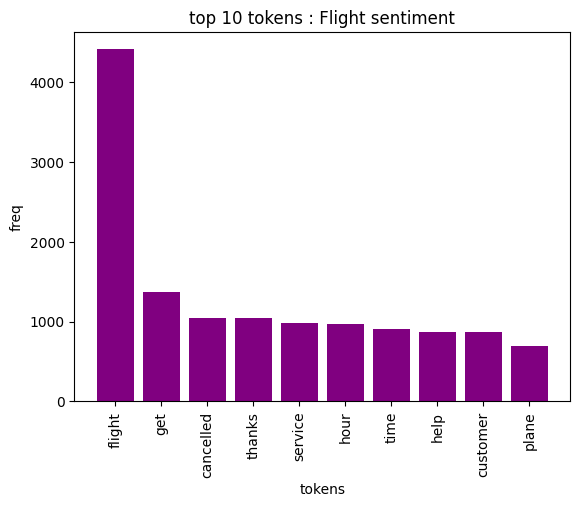

In [243]:
plt.bar(freqdf['tokens'][:10],freqdf['freq'][:10],color='purple')
plt.title('top 10 tokens : Flight sentiment')
plt.xlabel('tokens')
plt.ylabel('freq')
plt.xticks(rotation=90)
plt.show()

# word cloud

In [244]:
from wordcloud import WordCloud

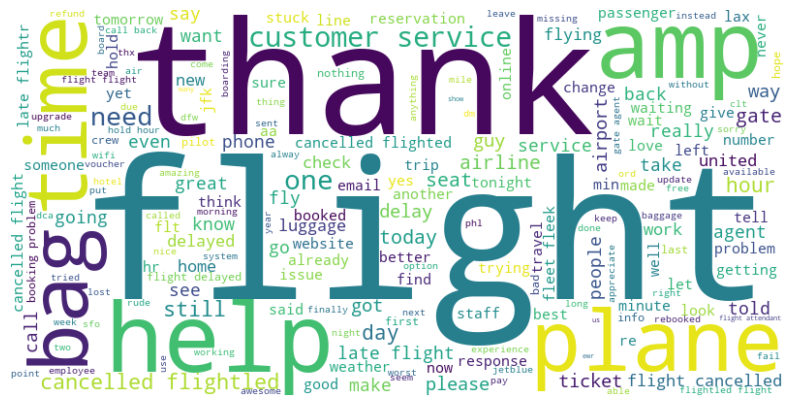

In [245]:
wordcloud=WordCloud(height=400,width=800,background_color='white').\
generate(' '.join(all_tokens))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [246]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

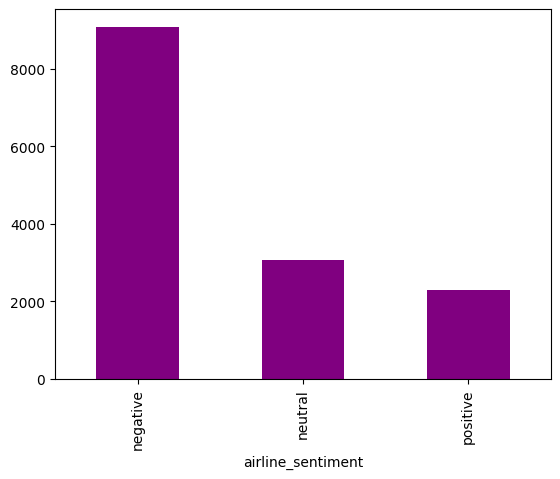

In [247]:
df['airline_sentiment'].value_counts().plot(kind='bar',color='purple')
plt.show()

In [248]:
mapped={'negative':2,'positive':1,'neutral':0}

In [249]:
df['target']=df['airline_sentiment'].map(mapped)

### Model building 
* Count vectorizer - Bag of words 
* TF-IDF vectorizer

# Bag of words

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [252]:
X=df['cleansed text']
y=df['target']

In [253]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=42)

In [254]:
xtrain

5165          wifi plane gotta pay help broke homegirl out
7316     boarding flight captain informs could exceed h...
2244     air another missed cnxn atc went strike belize...
5860     problem is issued position today gate option u...
12421    horrible service luggage got destroyed flight ...
                               ...                        
5211     failing diverted stuck communication make deci...
13599       wonderful fc fa flight pre dawn nice start day
5410                              flight taxi prior flight
862                               trying since file report
7296     hard younger sibling cousin want go airplane g...
Name: cleansed text, Length: 11561, dtype: object

# CountVectorizer

In [255]:
count_vect=CountVectorizer()
xtrain_cv=count_vect.fit_transform(xtrain)
xtest_cv=count_vect.transform(xtest)

In [256]:
lr=LogisticRegression()
lr.fit(xtrain_cv,ytrain)
ypred=lr.predict(xtest_cv)

In [257]:
accuracy_score(ytest,ypred)

0.7737806987201661

In [258]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       611
           1       0.73      0.62      0.67       480
           2       0.83      0.88      0.86      1800

    accuracy                           0.77      2891
   macro avg       0.72      0.69      0.71      2891
weighted avg       0.77      0.77      0.77      2891



In [259]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(xtrain_cv,ytrain)
ypred=rf.predict(xtest_cv)

In [260]:
accuracy_score(ytest,ypred)

0.7526807333102733

In [261]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.54       611
           1       0.70      0.54      0.61       480
           2       0.80      0.90      0.85      1800

    accuracy                           0.75      2891
   macro avg       0.70      0.64      0.67      2891
weighted avg       0.74      0.75      0.74      2891



# TfidfVectorizer

In [262]:
tfidf_vect=TfidfVectorizer()
xtrain_tfidf=tfidf_vect.fit_transform(xtrain)
xtest_tfidf=tfidf_vect.transform(xtest)

In [263]:
lr=LogisticRegression()
lr.fit(xtrain_tfidf,ytrain)
ypred=lr.predict(xtest_tfidf)

In [264]:
accuracy_score(ytest,ypred)

0.7651331719128329

In [265]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.53       611
           1       0.78      0.53      0.63       480
           2       0.78      0.94      0.85      1800

    accuracy                           0.77      2891
   macro avg       0.74      0.64      0.67      2891
weighted avg       0.76      0.77      0.75      2891



In [266]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(xtrain_tfidf,ytrain)
ypred=rf.predict(xtest_tfidf)

In [267]:
accuracy_score(ytest,ypred)

0.7533725354548599

In [268]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       611
           1       0.72      0.50      0.59       480
           2       0.78      0.92      0.84      1800

    accuracy                           0.75      2891
   macro avg       0.72      0.63      0.66      2891
weighted avg       0.74      0.75      0.74      2891



# Word2Vec

In [272]:
import gensim
from gensim.models import Word2Vec

In [282]:
words=[]
for sentence in df['cleansed text']:
    words.append([word for word in sentence.split()])

In [283]:
words

[['said'],
 ['plus', 'added', 'commercial', 'experience', 'tacky'],
 ['today', 'must', 'mean', 'need', 'take', 'another', 'trip'],
 ['really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guests',
  'face',
  'amp',
  'little',
  'recourse'],
 ['really', 'big', 'bad', 'thing'],
 ['seriously',
  'would',
  'pay',
  'flight',
  'seat',
  'playing',
  'really',
  'bad',
  'thing',
  'flying',
  'va'],
 ['yes',
  'nearly',
  'every',
  'time',
  'fly',
  'vx',
  'ear',
  'worm',
  'won',
  'go',
  'away'],
 ['really',
  'missed',
  'prime',
  'opportunity',
  'men',
  'without',
  'hat',
  'parody',
  'there'],
 ['well', 'didn', 'but', 'do'],
 ['amazing', 'arrived', 'hour', 'early', 'good'],
 ['know', 'suicide', 'second', 'leading', 'cause', 'death', 'among', 'teen'],
 ['lt', 'pretty', 'graphics', 'much', 'better', 'minimal', 'iconography'],
 ['great',
  'deal',
  'already',
  'thinking',
  'trip',
  'amp',
  'even',
  'gone',
  'trip',
  'yet'],
 ['flying',
  'fabulous'

In [284]:
model = Word2Vec(vector_size=100, window=5, min_count=5)

In [285]:
model.build_vocab(words)

In [286]:
model.train(words, total_examples=model.corpus_count, epochs=model.epochs)

(511679, 638455)

In [287]:
# To get all the vocabulary
model.wv.index_to_key

['flight',
 'get',
 'cancelled',
 'thanks',
 'service',
 'hour',
 'time',
 'customer',
 'help',
 'plane',
 'bag',
 'amp',
 'hold',
 'need',
 'thank',
 'one',
 'still',
 'please',
 'can',
 'would',
 'call',
 'delayed',
 'gate',
 'back',
 'airline',
 'flightled',
 'day',
 'got',
 'phone',
 'today',
 'like',
 'seat',
 'late',
 'delay',
 'agent',
 'fly',
 'know',
 'that',
 'make',
 'waiting',
 'ticket',
 'way',
 'airport',
 'trying',
 'guy',
 'change',
 'go',
 'great',
 'never',
 'wait',
 'going',
 'flying',
 'weather',
 'tomorrow',
 'last',
 'check',
 'really',
 'home',
 'good',
 'take',
 'even',
 'people',
 'minute',
 'want',
 'now',
 'min',
 'dm',
 'united',
 'first',
 'new',
 'see',
 'told',
 'another',
 'luggage',
 'we',
 'work',
 'problem',
 'say',
 'email',
 'number',
 'could',
 'love',
 'travel',
 'hr',
 'crew',
 'let',
 'ever',
 'someone',
 'lost',
 'getting',
 'worst',
 'due',
 'yes',
 'next',
 'baggage',
 'much',
 'trip',
 'issue',
 'flighted',
 'reservation',
 'again',
 'two',


In [288]:
# vocabulary size
model.corpus_count

14452

In [289]:
model.wv.similar_by_word('good')

[('better', 0.9986864924430847),
 ('that', 0.998238742351532),
 ('company', 0.998089075088501),
 ('american', 0.9980152249336243),
 ('guys', 0.9980093240737915),
 ('love', 0.9979556202888489),
 ('sure', 0.9979022741317749),
 ('awesome', 0.9978447556495667),
 ('amazing', 0.997838020324707),
 ('business', 0.9978168606758118)]

In [290]:
def avg_word2vec(doc):
    vectors = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [291]:
X=[]
for i in range(len(words)):
    X.append(avg_word2vec(words[i]))

In [292]:
X

[array([-0.18104406,  0.38520744,  0.03046315,  0.23736712,  0.01480158,
        -0.7643178 ,  0.12932691,  0.67614496, -0.19187416, -0.03061211,
        -0.19390112, -0.45969427,  0.03054748,  0.17828391,  0.0838787 ,
        -0.1815345 , -0.05309354, -0.35912445,  0.0667768 , -0.7015174 ,
         0.255205  ,  0.3230779 ,  0.10332114, -0.35497817, -0.21570635,
         0.20418005, -0.22762659, -0.41584036, -0.32128868, -0.10809863,
         0.25723976,  0.06638683,  0.22135417, -0.07434856, -0.10093796,
         0.55170316,  0.13072845, -0.38564527, -0.27232152, -0.5731142 ,
         0.32015687, -0.07325669, -0.03126846, -0.0457839 ,  0.36133718,
        -0.05364131, -0.42894408, -0.06965575,  0.31676263,  0.17700689,
         0.17580274, -0.25672358, -0.04138638,  0.03735145, -0.252058  ,
         0.10028906,  0.11843833, -0.06646736, -0.46023378,  0.16662692,
         0.01803072,  0.46517104, -0.21773496, -0.19105   , -0.42683566,
         0.2363016 , -0.15613542,  0.3582601 , -0.4

In [293]:
len(X)

14452

In [294]:
X=pd.DataFrame(X)

In [295]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.20,random_state=42)

In [296]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
rf=RandomForestClassifier()

In [298]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [299]:
ypred=rf.predict(xtest)

In [300]:
from sklearn.metrics import accuracy_score,classification_report

In [301]:
accuracy_score(ytest,ypred)

0.6911103424420616

In [302]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.55      0.30      0.39       611
           1       0.65      0.30      0.41       480
           2       0.72      0.93      0.81      1800

    accuracy                           0.69      2891
   macro avg       0.64      0.51      0.54      2891
weighted avg       0.67      0.69      0.65      2891

